mnist

Using TensorFlow backend.


58892288/58889256 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool

60000/60000 [==============================] - 68s 1ms/step - loss: 0.5408 - acc: 0.8253 - val_loss: 0.2794 - val_acc: 0.9124
Epoch 2/10
 6464/60000 [==>...........................] - ETA: 52s - loss: 0.2782 - acc: 0.9070

60000/60000 [==============================] - 66s 1ms/step - loss: 0.2453 - acc: 0.9218 - val_loss: 0.1554 - val_acc: 0.9500
Epoch 3/10
 8576/60000 [===>..........................] - ETA: 50s - loss: 0.1910 - acc: 0.9373

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1849 - acc: 0.9407 - val_loss: 0.1456 - val_acc: 0.9543
Epoch 4/10
 9408/60000 [===>..........................] - ETA: 49s - loss: 0.1640 - acc: 0.9496

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1565 - acc: 0.9495 - val_loss: 0.2051 - val_acc: 0.9283
Epoch 5/10
 9664/60000 [===>..........................] - ETA: 49s - loss: 0.1380 - acc: 0.9548

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1402 - acc: 0.9551 - val_loss: 0.1210 - val_acc: 0.9610
Epoch 6/10
 9664/60000 [===>..........................] - ETA: 49s - loss: 0.1522 - acc: 0.9524

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1307 - acc: 0.9586 - val_loss: 0.1541 - val_acc: 0.9517
Epoch 7/10
 9664/60000 [===>..........................] - ETA: 49s - loss: 0.1113 - acc: 0.9632

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1183 - acc: 0.9617 - val_loss: 0.1297 - val_acc: 0.9573
Epoch 8/10
 9728/60000 [===>..........................] - ETA: 49s - loss: 0.1149 - acc: 0.9634

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1112 - acc: 0.9638 - val_loss: 0.1130 - val_acc: 0.9628
Epoch 9/10
 9792/60000 [===>..........................] - ETA: 49s - loss: 0.1051 - acc: 0.9672

60000/60000 [==============================] - 66s 1ms/step - loss: 0.1028 - acc: 0.9672 - val_loss: 0.0953 - val_acc: 0.9703
Epoch 10/10
 9664/60000 [===>..........................] - ETA: 49s - loss: 0.1043 - acc: 0.9657

60000/60000 [==============================] - 66s 1ms/step - loss: 0.0989 - acc: 0.9672 - val_loss: 0.1020 - val_acc: 0.9673
Test loss: 0.10201766314683482
Test accuracy: 0.9673


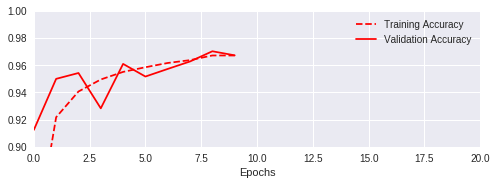

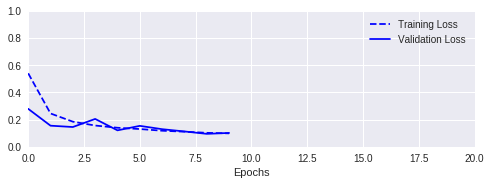

32512

In [0]:
import numpy as np
from keras.datasets import mnist
import gc

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import os

import cv2
import h5py as h5py 
import numpy as np
def tran_y(y): 
    y_ohe = np.zeros(10) 
    y_ohe[y] = 1 
    return y_ohe
epochs = 20

# 如果硬件配置较高，比如主机具备32GB以上内存，GPU具备8GB以上显存，可以适当增大这个值。VGG要求至少48像素
ishape=48
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

X_train = [cv2.cvtColor(cv2.resize(i, (ishape, ishape)), cv2.COLOR_GRAY2BGR) for i in X_train] 
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32') 
X_train /= 255.0

X_test = [cv2.cvtColor(cv2.resize(i, (ishape, ishape)), cv2.COLOR_GRAY2BGR) for i in X_test] 
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')
X_test /= 255.0

y_train_ohe = np.array([tran_y(y_train[i]) for i in range(len(y_train))]) 
y_test_ohe = np.array([tran_y(y_test[i]) for i in range(len(y_test))])
y_train_ohe = y_train_ohe.astype('float32')
y_test_ohe = y_test_ohe.astype('float32')


model_vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (ishape, ishape, 3)) 
for layer in model_vgg.layers:
        layer.trainable = False
model = Flatten()(model_vgg.output) 
model = Dense(4096, activation='relu', name='fc1')(model)
model = Dense(4096, activation='relu', name='fc2')(model)
model = Dropout(0.5)(model)
model = Dense(10, activation = 'softmax', name='prediction')(model) 
model_vgg_mnist_pretrain = Model(model_vgg.input, model, name = 'vgg16_pretrain')
model_vgg_mnist_pretrain.summary()
sgd = SGD(lr = 0.05, decay = 1e-5) 
model_vgg_mnist_pretrain.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
log  = model_vgg_mnist_pretrain.fit(X_train, y_train_ohe, validation_data = (X_test, y_test_ohe), epochs = epochs, batch_size = 64)

score = model_vgg_mnist_pretrain.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure('acc')  
plt.subplot(2, 1, 1)  
plt.plot(log.history['acc'],'r--',label='Training Accuracy')  
plt.plot(log.history['val_acc'],'r-',label='Validation Accuracy')  
plt.legend(loc='best')  
plt.xlabel('Epochs')  
plt.axis([0, epochs, 0.9, 1])  
plt.figure('loss')  
plt.subplot(2, 1, 2)  
plt.plot(log.history['loss'],'b--',label='Training Loss')  
plt.plot(log.history['val_loss'],'b-',label='Validation Loss')  
plt.legend(loc='best')  
plt.xlabel('Epochs')  
plt.axis([0, epochs, 0, 1])  
  
plt.show() 
os.system("pause")

尝试res50,但是没有成功

In [0]:
import numpy as np
from keras.datasets import mnist
import gc

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

import cv2
import h5py as h5py 
import numpy as np
def tran_y(y): 
    y_ohe = np.zeros(10) 
    y_ohe[y] = 1 
    return y_ohe
epochs =10

# 如果硬件配置较高，比如主机具备32GB以上内存，GPU具备8GB以上显存，可以适当增大这个值。VGG要求至少48像素
ishape=197
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

X_train = [cv2.cvtColor(cv2.resize(i, (ishape, ishape)), cv2.COLOR_GRAY2BGR) for i in X_train] 
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32') 
X_train /= 255.0

X_test = [cv2.cvtColor(cv2.resize(i, (ishape, ishape)), cv2.COLOR_GRAY2BGR) for i in X_test] 
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')
X_test /= 255.0

y_train_ohe = np.array([tran_y(y_train[i]) for i in range(len(y_train))]) 
y_test_ohe = np.array([tran_y(y_test[i]) for i in range(len(y_test))])
y_train_ohe = y_train_ohe.astype('float32')
y_test_ohe = y_test_ohe.astype('float32')


model_resnet50 = ResNet50(include_top = False, weights = 'imagenet', input_shape = (ishape, ishape, 3))

for layer in model_resnet50:
        layer.trainable = False

model = Flatten()(model_resnet50.output) 
model = Dense(4096, activation='relu', name='fc1')(model)
model = Dense(4096, activation='relu', name='fc2')(model)
model = Dropout(0.5)(model)
model = Dense(10, activation = 'softmax', name='prediction')(model) 

model_resnet50_pretrain = Model(model_resnet50.input,model,name = 'resnet50_pretrain')
model_resnet50_pretrain.summary()
sgd = SGD(lr = 0.05, decay = 1e-5) 
model_resnet50_pretrain.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
log  = model_resnet50_pretrain.fit(X_train, y_train_ohe, validation_data = (X_test, y_test_ohe), epochs = 10, batch_size = 64)

score = model_resnet50_pretrain.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure('acc')  
plt.subplot(2, 1, 1)  
plt.plot(log.history['acc'],'r--',label='Training Accuracy')  
plt.plot(log.history['val_acc'],'r-',label='Validation Accuracy')  
plt.legend(loc='best')  
plt.xlabel('Epochs')  
plt.axis([0, epochs, 0.9, 1])  
plt.figure('loss')  
plt.subplot(2, 1, 2)  
plt.plot(log.history['loss'],'b--',label='Training Loss')  
plt.plot(log.history['val_loss'],'b-',label='Validation Loss')  
plt.legend(loc='best')  
plt.xlabel('Epochs')  
plt.axis([0, epochs, 0, 1])  
plt.show() 

Using TensorFlow backend.


fashion-mnist

In [0]:
import numpy as np
from keras.datasets import fashion_mnist
import gc

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import os

import cv2
import h5py as h5py 
import numpy as np
def tran_y(y): 
    y_ohe = np.zeros(10) 
    y_ohe[y] = 1 
    return y_ohe
epochs = 10

# 如果硬件配置较高，比如主机具备32GB以上内存，GPU具备8GB以上显存，可以适当增大这个值。VGG要求至少48像素
ishape=48
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

X_train = [cv2.cvtColor(cv2.resize(i, (ishape, ishape)), cv2.COLOR_GRAY2BGR) for i in X_train] 
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32') 
X_train /= 255.0

X_test = [cv2.cvtColor(cv2.resize(i, (ishape, ishape)), cv2.COLOR_GRAY2BGR) for i in X_test] 
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')
X_test /= 255.0

y_train_ohe = np.array([tran_y(y_train[i]) for i in range(len(y_train))]) 
y_test_ohe = np.array([tran_y(y_test[i]) for i in range(len(y_test))])
y_train_ohe = y_train_ohe.astype('float32')
y_test_ohe = y_test_ohe.astype('float32')


model_vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (ishape, ishape, 3)) 
for layer in model_vgg.layers:
        layer.trainable = False
model = Flatten()(model_vgg.output) 
model = Dense(4096, activation='relu', name='fc1')(model)
model = Dense(4096, activation='relu', name='fc2')(model)
model = Dropout(0.5)(model)
model = Dense(10, activation = 'softmax', name='prediction')(model) 
model_vgg_mnist_pretrain = Model(model_vgg.input, model, name = 'vgg16_pretrain')
model_vgg_mnist_pretrain.summary()
sgd = SGD(lr = 0.05, decay = 1e-5) 
model_vgg_mnist_pretrain.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
log  = model_vgg_mnist_pretrain.fit(X_train, y_train_ohe, validation_data = (X_test, y_test_ohe), epochs = epochs, batch_size = 64)

score = model_vgg_mnist_pretrain.evaluate(X_test, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure('acc')  
plt.subplot(2, 1, 1)  
plt.plot(log.history['acc'],'r--',label='Training Accuracy')  
plt.plot(log.history['val_acc'],'r-',label='Validation Accuracy')  
plt.legend(loc='best')  
plt.xlabel('Epochs')  
plt.axis([0, epochs, 0.9, 1])  
plt.figure('loss')  
plt.subplot(2, 1, 2)  
plt.plot(log.history['loss'],'b--',label='Training Loss')  
plt.plot(log.history['val_loss'],'b-',label='Validation Loss')  
plt.legend(loc='best')  
plt.xlabel('Epochs')  
plt.axis([0, epochs, 0, 1])  
  
plt.show() 
os.system("pause")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

60000/60000 [==============================] - 66s 1ms/step - loss: 0.6387 - acc: 0.7708 - val_loss: 0.5471 - val_acc: 0.8014
Epoch 2/10
 6656/60000 [==>...........................] - ETA: 52s - loss: 0.4863 - acc: 0.8265

60000/60000 [==============================] - 66s 1ms/step - loss: 0.4647 - acc: 0.8301 - val_loss: 0.5079 - val_acc: 0.8102
Epoch 3/10
 8576/60000 [===>..........................] - ETA: 49s - loss: 0.4375 - acc: 0.8405

60000/60000 [==============================] - 65s 1ms/step - loss: 0.4253 - acc: 0.8438 - val_loss: 0.4183 - val_acc: 0.8486
Epoch 4/10
 9408/60000 [===>..........................] - ETA: 49s - loss: 0.4007 - acc: 0.8536

60000/60000 [==============================] - 65s 1ms/step - loss: 0.3996 - acc: 0.8521 - val_loss: 0.4397 - val_acc: 0.8406
Epoch 5/10
 9664/60000 [===>..........................] - ETA: 48s - loss: 0.3867 - acc: 0.8562

60000/60000 [==============================] - 65s 1ms/step - loss: 0.3800 - acc: 0.8595 - val_loss: 0.4522 - val_acc: 0.8344
Epoch 6/10
 9792/60000 [===>..........................] - ETA: 48s - loss: 0.3674 - acc: 0.8666

60000/60000 [==============================] - 65s 1ms/step - loss: 0.3652 - acc: 0.8664 - val_loss: 0.3937 - val_acc: 0.8600
Epoch 7/10
 9856/60000 [===>..........................] - ETA: 48s - loss: 0.3509 - acc: 0.8702

60000/60000 [==============================] - 65s 1ms/step - loss: 0.3558 - acc: 0.8688 - val_loss: 0.3717 - val_acc: 0.8646
Epoch 8/10
 9856/60000 [===>..........................] - ETA: 48s - loss: 0.3400 - acc: 0.8735

53824/60000 [=========================>....] - ETA: 5s - loss: 0.3445 - acc: 0.8724